
# Maize Dataset Analysis

In this notebook, we'll embark on a comprehensive analysis of a dataset related to maize. Our analysis will encompass multiple stages, including data loading, exploration, cleaning, and transformation to prepare it for machine learning. By the time we conclude, we aim to have gained a thorough understanding of the dataset's underlying structure, identified any missing data points, and preprocessed it for subsequent machine learning tasks.


# Step 1: Loading the Dataset:

## 1: Library Imports

In this code block, we import three essential Python libraries for data analysis and visualization:

In [124]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 2: Loading Maize Dataset and Data Inspection

We start by loading the dataset related to maize. 


In [125]:

# Load the dataset
cropstats_maize_df = pd.read_csv('./resources/crop stats/CropStats_maize.csv')
cropstats_maize_df.head()


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,575,1922,Indonesia,Java (and Madura),maize,1573000.0,1580000.0,1922,1.004450,NaN,NaN
1,576,1923,Indonesia,Java (and Madura),maize,1630000.0,1547000.0,1923,0.949080,NaN,NaN
2,577,1924,Indonesia,Java (and Madura),maize,1763000.0,1721000.0,1924,0.976177,NaN,NaN
3,578,1925,Indonesia,Java (and Madura),maize,1598000.0,1659000.0,1925,1.038173,NaN,NaN
4,579,1926,Indonesia,Java (and Madura),maize,1962000.0,2042000.0,1926,1.040775,NaN,NaN



Here are the  columns in the loaded dataset:

- **Unnamed: 0**: This column appears to be an index or identifier for each record.
- **Harvest_year**: The year in which the maize harvest occurred.
- **admin0**: The country where the maize was harvested.
- **admin1**: A specific administrative division within the country.
- **crop**: The type of crop, which is maize in this case.
- **hectares (ha)**: The number of hectares of land used for maize cultivation.
- **production (tonnes)**: The total production of maize in tonnes.
- **year**: The year associated with the data record.
- **yield (tonnes/ha)**: The yield of maize per hectare in tonnes.
- **admin2**: Another level of administrative division within the region.
- **notes**: Additional notes or information related to the data.

These columns provide essential information for our analysis and will be used to gain insights into maize production in the specified regions and years.



## 3: Inspecting Data Types of Columns

Understanding the data types of each column is crucial. It informs us about the nature of the data we're dealing with and helps identify if a column's type aligns with the kind of data it represents.


In [126]:

# Inspect the data types of the columns
data_types = cropstats_maize_df.dtypes
data_types


Unnamed: 0               int64
Harvest_year             int64
admin0                  object
admin1                  object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
admin2                 float64
notes                   object
dtype: object

### Data Types

- `Unnamed: 0`: Integer (likely an index or identifier column)
- `Harvest_year`: Integer (represents the year of harvest)
- `admin0`: Object (likely a categorical variable representing country or top-level administrative division)
- `admin1`: Object (potentially a sub-national division such as state or province)
- `crop`: Object (the type of crop, which should be maize for all records in this context)
- `hectares (ha)`: Float (representing the area harvested, in hectares)
- `production (tonnes)`: Float (quantity of crop produced, in tonnes)
- `year`: Integer (the year associated with the record, should be similar or identical to Harvest_year)
- `yield(tonnes/ha)`: Float (the yield of the crop in tonnes per hectare)
- `admin2`: Float (may represent a further sub-division like district or county, though it's unusual to be a float)
- `notes`: Object (may contain additional textual information about the record)

Each of these columns will play a critical role in our analysis. Understanding their data types is essential as it informs how we can manipulate these columns and the types of analysis we can perform


## 4: Descriptive Statistics of the Dataset

Descriptive statistics provide a quick summary of the central tendencies, dispersion, and shape of the dataset's distribution, it helps us grasp the dataset's overall characteristics.


In [127]:

# Display summary statistics
summary_statistics = cropstats_maize_df.describe()
summary_statistics


,Unnamed: 0,Harvest_year,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2
count,14600.000000,14600.000000,1.385100e+04,1.373300e+04,14600.000000,13322.000000,0.0
mean,19333.953699,1951.000685,6.385608e+05,2.087020e+06,1950.979178,3.482336,NaN
std,9802.534624,40.338173,1.276518e+06,6.158588e+06,40.330708,2.787216,NaN
min,575.000000,1861.000000,0.000000e+00,0.000000e+00,1861.000000,0.092384,NaN
25%,10160.750000,1920.000000,1.214040e+04,3.303900e+04,1920.000000,1.368430,NaN
50%,20518.500000,1953.000000,1.182482e+05,2.885592e+05,1953.000000,2.322451,NaN
75%,24168.250000,1985.000000,6.837069e+05,1.491000e+06,1985.000000,5.108813,NaN
max,34705.000000,2019.000000,2.023036e+07,1.342875e+08,2019.000000,17.168477,NaN


### Summary Statistics
Here are some summary statistics for a selection of numerical columns:

- **Unnamed: 0**: This column seems to be an index with a minimum value of 575 and a maximum value of 34,705.
- **Harvest_year**: The dataset spans from 1861 to 2019.
- **hectares (ha)**: The data ranges from 0 hectares to 20,230,360 hectares.
- **production (tonnes)**: The production quantity varies from 0 tonnes to 134,287,500 tonnes.
- **year**: This column essentially duplicates the "Harvest_year" column.
- **yield (tonnes/ha)**: The yield per hectare ranges from 0.0924 to 17.1685.
- **admin2**: This column appears to contain missing values (NaN) for all rows.

These insights into data types and summary statistics provide a foundation for our subsequent data analysis and preprocessing steps.


## 5: Checking for Duplicated Rows

Duplicate rows can skew our analysis, so it's essential to identify and handle them. We'll check if there are any repeated rows in the dataset.


In [128]:

# Check for duplicated rows
duplicated_rows = cropstats_maize_df[cropstats_maize_df.duplicated()]
duplicated_rows_count = duplicated_rows.shape[0]
duplicated_rows_count


0

We've performed a check for duplicated rows in our dataset. Afterward, we counted the number of duplicated rows, and the count is 0.

This means that there are no exact duplicate records in the dataset. Each row appears to be unique.


## 6: Checking for Missing Values

Identifying missing values is essential as they can significantly impact the results of any analysis. Knowing where we have gaps allows us to make informed decisions on data imputation or removal.


In [129]:

# Check for missing values
missing_values = cropstats_maize_df.isnull().sum()
missing_values


Unnamed: 0                 0
Harvest_year               0
admin0                     0
admin1                   785
crop                       0
hectares (ha)            749
production (tonnes)      867
year                       0
yield(tonnes/ha)        1278
admin2                 14600
notes                  11808
dtype: int64

We've conducted an examination to identify missing values within our dataset. The result is summarized below:

- **Unnamed: 0**: No missing values.
- **Harvest_year**: No missing values.
- **admin0**: No missing values.
- **admin1**: There are 785 missing values in this column.
- **crop**: No missing values.
- **hectares (ha)**: There are 749 missing values in this column.
- **production (tonnes)**: There are 867 missing values in this column.
- **year**: No missing values.
- **yield(tonnes/ha)**: There are 1,278 missing values in this column.
- **admin2**: All 14,600 values in this column are missing (NaN).
- **notes**: 11,808 values in this column are missing.

It's important to be aware of these missing values as they can impact our analysis and machine learning models. We'll need to address them through data imputation or other strategies during the data preprocessing stage.



# Step 2: Data Cleaning and Transformation


## 1. Data Transformations

We're applying several data transformations to enhance the dataset's usability and clarity:

1. **'Harvest_year' Conversion**: We've converted the 'Harvest_year' column to a datetime format, specifically year (with the format '%Y'). This allows us to work with the year component, making it more useful for time-based analysis.

2. **Column Removal**: We've dropped several columns from the dataset to streamline and focus our analysis. The columns dropped are: 'Unnamed: 0', 'year', 'admin2', and 'crop'. Removing unnecessary columns helps reduce complexity and improves the dataset's clarity.

3. **Column Renaming**: We've renamed the 'admin0' column to 'country' for more descriptive and intuitive column names.

Here's a preview of the modified dataset to show the impact of these transformations.


In [130]:

# Convert 'Harvest_year' to datetime, drop columns, and rename
cropstats_maize_df['Harvest_year'] = pd.to_datetime(cropstats_maize_df['Harvest_year'], format='%Y').dt.year
columns_to_drop = ['Unnamed: 0', 'year', 'admin2', 'crop']
cropstats_maize_df = cropstats_maize_df.drop(columns=columns_to_drop)
cropstats_maize_df = cropstats_maize_df.rename(columns={'admin0': 'country'})
cropstats_maize_df.head()


,Harvest_year,country,admin1,hectares (ha),production (tonnes),yield(tonnes/ha),notes
0,1922,Indonesia,Java (and Madura),1573000.0,1580000.0,1.004450,NaN
1,1923,Indonesia,Java (and Madura),1630000.0,1547000.0,0.949080,NaN
2,1924,Indonesia,Java (and Madura),1763000.0,1721000.0,0.976177,NaN
3,1925,Indonesia,Java (and Madura),1598000.0,1659000.0,1.038173,NaN
4,1926,Indonesia,Java (and Madura),1962000.0,2042000.0,1.040775,NaN


## 2. Exploring Textual Data: The 'notes' Column

This section delves into the 'notes' column, which contains textual annotations or additional information relevant to `admin1` in the dataset.

This exploratory step is crucial for qualitative data analysis, as it helps in understanding any manual annotations or remarks that could influence the interpretation of the data. Such textual data can contain insights that are not immediately apparent through quantitative analysis alone. Depending on the findings, this column may either be used for further analysis or cleaned if it's not relevant to the objectives of the study.


In [131]:
# Explore unique values in the 'notes' column
unique_notes = cropstats_maize_df['notes'].unique()

# Sample entries where 'notes' column is populated
sample_notes_entries = cropstats_maize_df[cropstats_maize_df['notes'].notnull()].sample(5)

unique_notes, sample_notes_entries[['admin1','notes']]

(array([nan, 'INSEE code 11', 'INSEE code 21', 'INSEE code 22',
        'INSEE code 23', 'INSEE code 24', 'INSEE code 25', 'INSEE code 26',
        'INSEE code 31', 'INSEE code 41', 'INSEE code 42', 'INSEE code 43',
        'INSEE code 52', 'INSEE code 53', 'INSEE code 54', 'INSEE code 72',
        'INSEE code 73', 'INSEE code 74', 'INSEE code 82', 'INSEE code 83',
        'INSEE code 91', 'INSEE code 93', 'INSEE code 94',
        'Hebei, Beijing, Tianjin, Liaoning, Jilin, Heilongjiang, Nei Mongol',
        'Sichuan, Xizang, Chongqing'], dtype=object),
                          admin1          notes
 2530  Provence-Alpes-Côte dAzur  INSEE code 93
 2558        Centre-Val de Loire  INSEE code 24
 2463       Languedoc-Roussillon  INSEE code 91
 3514                  Aquitaine  INSEE code 72
 1701             Lower Normandy  INSEE code 25)

The `notes` column appears to contain specific codes and regional groupings. Here's a summary:

**Unique values in `notes`**:

- Several entries start with "INSEE code", followed by a two-digit number. INSEE codes are specific to France and are used to identify administrative regions.
- Some entries list multiple regions, such as "Hebei, Beijing, Tianjin, Liaoning, Jilin, Heilongjiang, Nei Mongol" and "Sichuan, Xizang, Chongqing".

**Sample entries where `notes` column is populated**:

- For instance, the region "Pays de la Loire" is associated with the "INSEE code 52".
- The region "Brittany" corresponds to "INSEE code 53".
- The region "Limousin" has the "INSEE code 74".

The decision is remove the 'notes' column from the entire dataset comes after concluding that, aside from the specific context of Chinese region details, it does not provide substantial value to our analysis. Post-transfer of relevant information for China into 'admin1', the 'notes' column's purpose has been served, and it is subsequently dropped to simplify the dataset.

Through this process, we streamline the dataset by retaining only meaningful information and discarding what is not necessary. By doing so, we improve the dataset's overall quality and focus, making it more amenable to accurate analysis and modeling.

In [132]:
# Filter out rows related to China
china_data = cropstats_maize_df[cropstats_maize_df['country'] == 'China']

# For rows where 'notes' is not null, copy the content from 'notes' to 'admin1'
china_data.loc[china_data['notes'].notnull(), 'admin1'] = china_data['notes']

# Update the main dataframe with the changes
cropstats_maize_df.update(china_data)


cropstats_maize_df = cropstats_maize_df.drop(columns='notes')

 Post-transfer of relevant information for China into 'admin1', the 'notes' column's purpose has been served, and it is subsequently dropped to simplify the dataset.

Through this process, we streamline the dataset by retaining only meaningful information and discarding what is not necessary. By doing so, we improve the dataset's overall quality and focus, making it more amenable to accurate analysis and modeling.

## 3. Exploring  The 'admin1' Column

**`admin1` (2,612 missing entries)** :

- This column represents subdivisions within a country or detailed regional information. The absence of values here could mean a variety of things. It's possible the data for those subdivisions wasn't available, or it might have been aggregated at the country level.

- **Solution**: For categorical variables like regions, it might be appropriate to use "Special value imputation" and assign a value like "Unknown" or "Not Specified" to these missing entries.

In [133]:

# Define a function to concatenate "Unknown" with the country name if "admin1" is missing
def impute_admin1(row):
    if pd.isnull(row['admin1']):
        return "Unknown " + row['country']
    else:
        return row['admin1']

# Apply the function to each row in the DataFrame
cropstats_maize_df['admin1'] = cropstats_maize_df.apply(impute_admin1, axis=1)

# Verify if there are still any missing values in 'admin1'
missing_admin1_after = cropstats_maize_df['admin1'].isnull().sum()
missing_admin1_after

0

## 4. Exploring  The `year` Column



### Analyzing Data Distribution Over Time

In this section, we investigate how the number of records in our dataset is distributed over the years. This analysis can provide insights into the consistency and completeness of data collection over time.

1. **Grouping and Counting Records**: We utilize the `groupby` method on the 'Harvest_year' column to aggregate the dataset by year. The `size` function is then called to count the number of records for each year. This results in a series where the index is the 'Harvest_year' and the values are the counts of records.

2. **Visualizing the Data Count**: To better understand the distribution and to identify any trends or anomalies, we visualize the data using a bar chart. 

This visualization helps identify any significant changes in data collection efforts over time, such as increases or decreases in the number of records. It can also help spot years with missing data, which may require further investigation.

By examining the yearly distribution of records, we can assess the dataset's temporal coverage and ensure that our analyses account for variations in data availability across different periods.



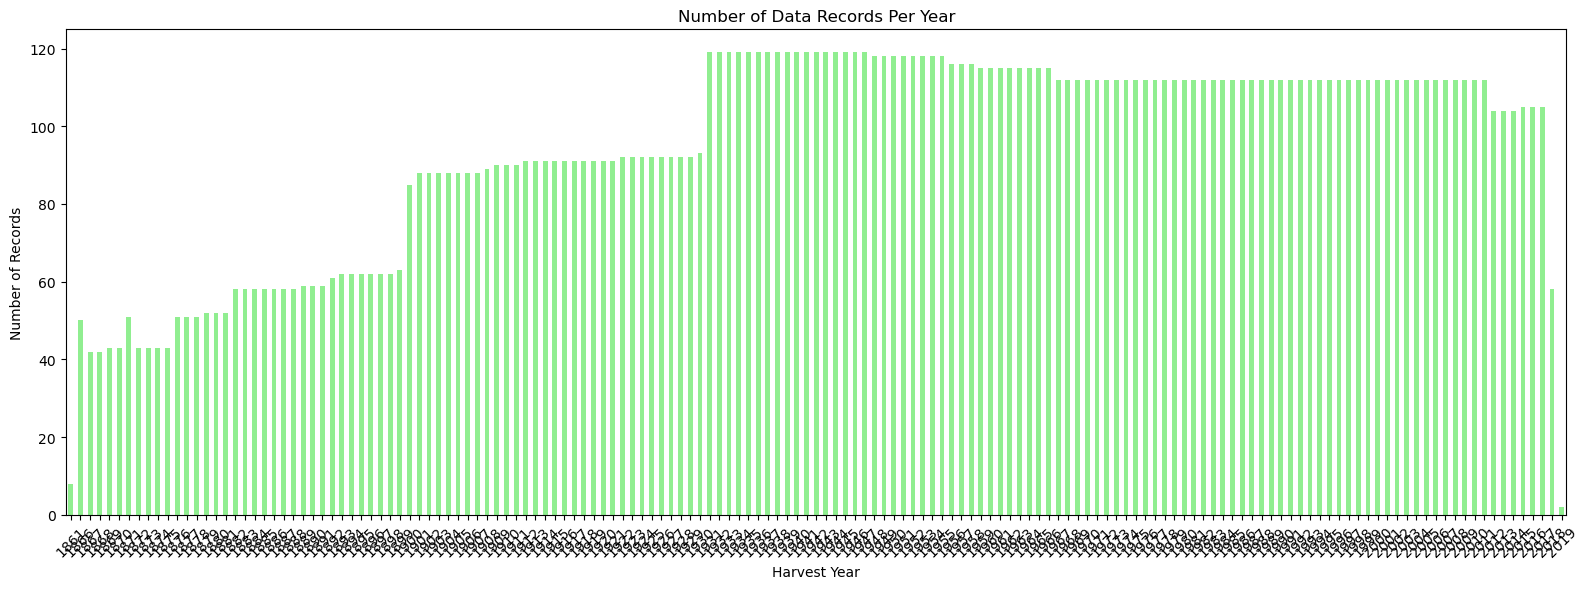

In [134]:
# Group the data by 'Harvest_year' and count the number of records for each year
data_count_per_year = cropstats_maize_df.groupby('Harvest_year').size()

# Plotting the data count per yearj
plt.figure(figsize=(16, 6))
data_count_per_year.plot(kind='bar', color='lightgreen')
plt.xlabel('Harvest Year')
plt.ylabel('Number of Records')
plt.title('Number of Data Records Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We've created a visualization that compares the number of data records for each year. The chart clearly illustrates that the dataset exhibits fluctuations in the volume of data across different years. Notably, certain years are associated with a substantially larger number of data records than others.

As a result, we have decided to focus our analysis on records from the year 1930 and onwards. This choice is motivated by the desire to work with a more consistent and robust subset of the dataset, given the variations in data availability across different years.

### Data Filtering and Missing Value Calculation

We've taken the following steps to refine our dataset and assess missing data for the years 1930 and onwards:

1. **Filtering the Dataset**: We filtered the dataset to retain only records with 'Harvest_year' greater than or equal to 1930. This narrows our focus to a more consistent and relevant subset of data.

2. **Missing Data Calculation**: For the filtered data, we grouped it by 'Harvest_year' and then applied a function to calculate the number of missing values in each column for each year. This provides insight into the extent of missing data for each year.

3. **Total Missing Data**: We further calculated the 'total_missing' column, which represents the sum of missing values across all columns for each year. This summary metric helps us assess the overall data quality for each year within the selected time range.

In [135]:
# Filter the dataset for years from 1930 to 2017

data_1930_onward = cropstats_maize_df[
    (cropstats_maize_df['Harvest_year'] >= 1930) & 
    (cropstats_maize_df['Harvest_year'] <= 2017)
]

# Group the data by 'Harvest_year' and sum the missing values in each column for years from 1930 onward
missing_data_count_1930_onward = data_1930_onward.groupby('Harvest_year').apply(lambda x: x.isnull().sum())
missing_data_count_1930_onward['total_missing'] = missing_data_count_1930_onward.sum(axis=1)

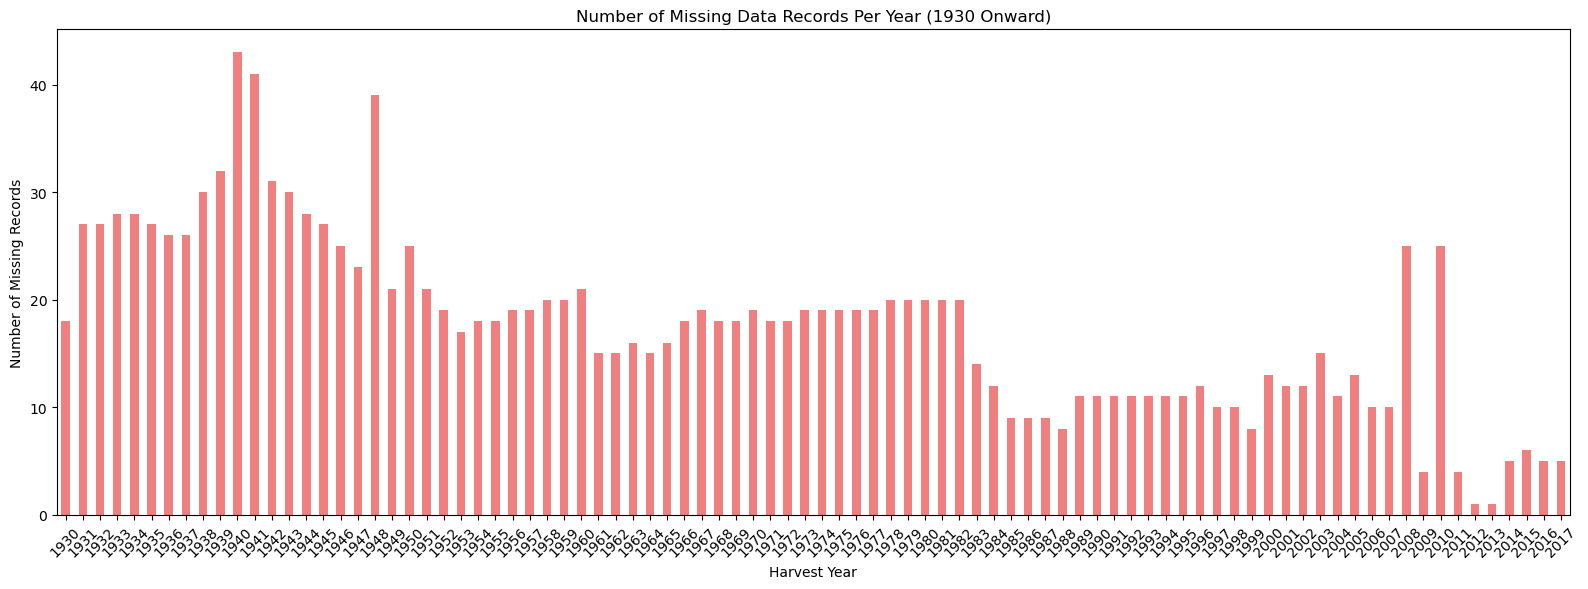

In [136]:
# Plotting the total missing data per year
plt.figure(figsize=(16, 6))
missing_data_count_1930_onward['total_missing'].plot(kind='bar', color='lightcoral')
plt.xlabel('Harvest Year')
plt.ylabel('Number of Missing Records')
plt.title('Number of Missing Data Records Per Year (1930 Onward)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualizing Missing Data Per Year

We've generated a bar plot to visually represent the number of missing data records for each year from 1930 onward. Here's what the plot conveys:

- **X-Axis (Harvest Year)**: Each bar on the X-axis represents a specific harvest year, allowing us to track the data quality over time.
- **Y-Axis (Number of Missing Records)**: The height of each bar corresponds to the total number of missing data records for the respective year.

The plot provides a clear and intuitive overview of data completeness for each year within the selected time range. Understanding the variation in missing data across different years is essential for making informed decisions regarding data imputation or analysis strategies.


## 5. Assessing Data Quality in 'production (tonnes)' by Region

In this part of the analysis, we scrutinize the 'production (tonnes)' column to quantify the extent of non-reported or unsuccessful harvests from 1930 onwards, as indicated by NaN, missing, or zero values.

**Visual Representation**: A horizontal bar chart is used to visualize the results, providing a clear and immediate visual assessment of regions with data quality issues.

This visualization and analysis are vital for identifying regions with the most significant number of unreported or unsuccessful production records. Such insights can guide further investigation into regional data collection practices, agricultural success rates, or reporting accuracy, and inform decisions about data imputation or exclusion.



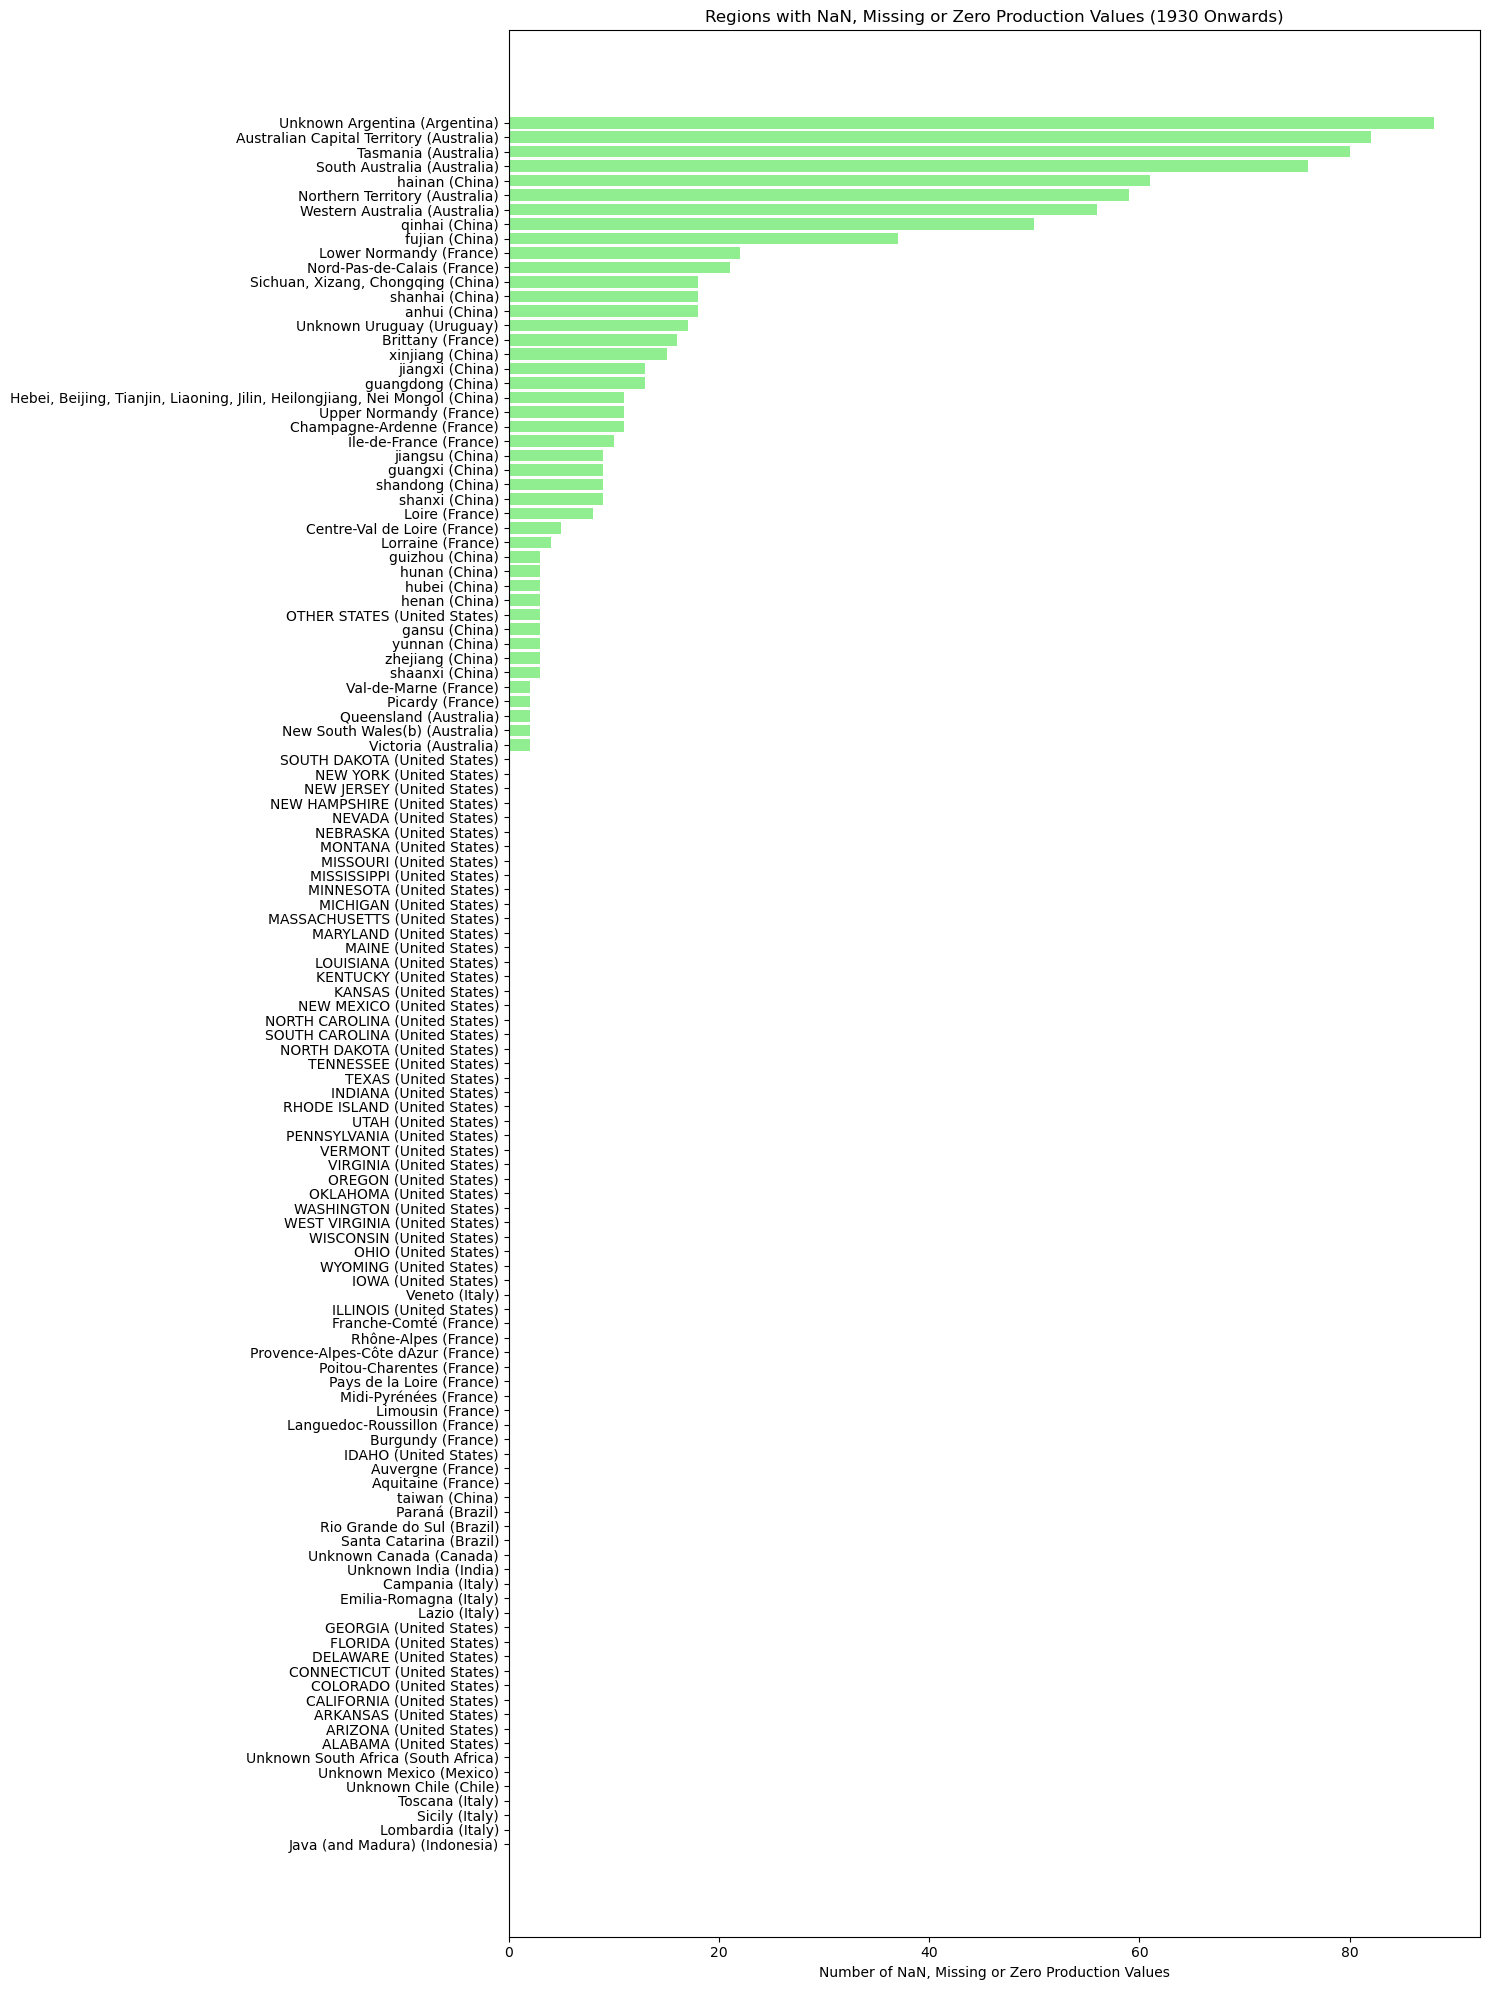

In [137]:
# Calculate the number of NaN, missing, or zero values in the 'production (tonnes)' column for each region from 1930 onwards
all_nan_missing_or_zero_production_values = data_1930_onward.groupby(['country', 'admin1'])['production (tonnes)'].apply(lambda x: (x.isna() | (x == 0)).sum()).reset_index()

# Rename the columns for clarity
all_nan_missing_or_zero_production_values.columns = ['Country', 'Admin1', 'Number of NaN, Missing or Zero Production Values']

# Sort values for visualization
sorted_nan_missing_or_zero_values = all_nan_missing_or_zero_production_values.sort_values(by='Number of NaN, Missing or Zero Production Values', ascending=False)

# Plot
plt.figure(figsize=(15, 20))
plt.barh(sorted_nan_missing_or_zero_values['Admin1'] + ' (' + sorted_nan_missing_or_zero_values['Country'] + ')', sorted_nan_missing_or_zero_values['Number of NaN, Missing or Zero Production Values'], color='lightgreen')
plt.xlabel('Number of NaN, Missing or Zero Production Values')
plt.title('Regions with NaN, Missing or Zero Production Values (1930 Onwards)')
plt.gca().invert_yaxis()  # To display the region with the highest number at the top
plt.tight_layout()
plt.show()

**Key Observations from the Visualization:**

- **Prevalence of Missing Data**: The visualization reveals that several regions have a high number of records with missing or zero production values. This finding is critical as it indicates potential areas where crop production data is unreliable or where harvests have consistently been unsuccessful or unreported.
  
- **Data Collection Challenges**: The regions with many missing records could reflect challenges in data collection or reporting mechanisms in those areas. It might also suggest environmental or socio-economic factors that lead to frequent crop failures, which are reported as zero production values.

- **Impact on Analysis**: The presence of such missing data can significantly impact any statistical or predictive analysis. For instance, if the goal is to model crop yields or production trends, these missing values could introduce biases or inaccuracies into the model.

**Possible Actions and Considerations:**

- **Investigating Underlying Causes**: It would be crucial to investigate why these records are missing. Are the zeros a result of crop failures, or do they indicate years where no data was collected? Understanding the underlying cause is essential for determining the appropriate method to handle these missing values.
  
- **Data Imputation or Exclusion**: Depending on the reason for the missing data, we may choose to impute missing values using statistical methods or exclude these regions from certain analyses. The choice of strategy should be informed by the nature of the missing data and the analysis objectives.

- **Communicating Limitations**: When presenting findings from this dataset, it's important to communicate the limitations imposed by these missing values. Any conclusions or predictions should be qualified by noting the potential impact of the data quality issues identified.


.

 ## Conclusion and Next Steps

The visualizations presented in this analysis serve as an initial step in addressing data quality concerns within our dataset. These visualizations help us identify issues, such as missing years for specific regions.

**Conclusion:**
We've observed that some regions have varying data start years or contain gaps in their records. To enhance data completeness and consistency, we plan to address these issues.

**Next Steps:**

To ensure that every country and its respective region have data starting from 1930, we will proceed as follows:

1. **Identify Unique Country-Region Combinations**: We begin by identifying all unique combinations of countries and regions within the dataset to ensure comprehensive coverage.

2. **Create a Complete Year Range**: Next, we create a DataFrame containing a complete range of years, starting from 1930 up to the latest available year for each country-region combination.

3. **Identify Missing Entries**: We merge the existing data with the complete data to identify missing entries, ensuring that every year is represented for each country-region pair.

4. **Fill Missing Values**: Missing values are filled with zeros for the years that were previously missing, ensuring data completeness and consistency.

By implementing these steps, we aim to establish a more robust and reliable dataset that allows for a more comprehensive and accurate analysis.

This process of addressing data gaps and inconsistencies sets the stage for more in-depth analyses and modeling.


In [138]:
# Identify all unique country-region combinations
country_regions = data_1930_onward.groupby(['country', 'admin1']).size().reset_index()[['country', 'admin1']]

# Create a DataFrame for the complete range of years from 1930 onwards for each country-region
years = list(range(1930, data_1930_onward['Harvest_year'].max() + 1))
complete_data = pd.DataFrame([(country, region, year) for country, region in zip(country_regions['country'], country_regions['admin1']) for year in years], columns=['country', 'admin1', 'Harvest_year'])

# Merge the existing data with the complete data to identify missing entries
merged_data = complete_data.merge(data_1930_onward, on=['country', 'admin1', 'Harvest_year'], how='left')

# Fill missing values with zeros
merged_data_filled = merged_data.fillna(0)

# Check the data to ensure every country-region now starts from 1930
cropstats_maize_df = merged_data_filled.sort_values(by=['country', 'admin1', 'Harvest_year'])
cropstats_maize_df.head()

,country,admin1,Harvest_year,hectares (ha),production (tonnes),yield(tonnes/ha)
0,Argentina,Unknown Argentina,1930,4220000.0,0.0,1.689
1,Argentina,Unknown Argentina,1931,4685250.0,0.0,2.275
2,Argentina,Unknown Argentina,1932,3851690.0,0.0,1.974
3,Argentina,Unknown Argentina,1933,3793355.0,0.0,1.793
4,Argentina,Unknown Argentina,1934,4112030.0,0.0,1.587


## 6. Addressing Different Types of Missing Values

In our analysis, we've noticed that some records contain varying types of missing values, where hectares, production, or yield may be missing while others are available. To correct the zero values in the dataset, we have established the following rules:

- For rows where both hectares and production are available, but yield is zero, we replace the zero yield with the calculated value: production divided by hectares.
- For rows where both yield and hectares are available, but production is zero, we replace the zero production with the calculated value: yield multiplied by hectares.
- For rows where both production and yield are available, but hectares is zero, we replace the zero hectares with the calculated value: production divided by yield.

These rules are applied selectively to rows where the necessary values to perform the calculations are not zero, ensuring that we address the missing or zero values correctly without introducing incorrect inferences.


In [139]:
# Replace zero values in the dataset with calculated values where appropriate
def replace_zero_values(row):
    if row['hectares (ha)'] != 0 and row['production (tonnes)'] != 0 and row['yield(tonnes/ha)'] == 0:
        row['yield(tonnes/ha)'] = row['production (tonnes)'] / row['hectares (ha)']
    if row['yield(tonnes/ha)'] != 0 and row['hectares (ha)'] != 0 and row['production (tonnes)'] == 0:
        row['production (tonnes)'] = row['yield(tonnes/ha)'] * row['hectares (ha)']
    if row['production (tonnes)'] != 0 and row['yield(tonnes/ha)'] != 0 and row['hectares (ha)'] == 0:
        row['hectares (ha)'] = row['production (tonnes)'] / row['yield(tonnes/ha)']
    return row

# Apply the function to replace zero values
replaced_data = cropstats_maize_df.apply(replace_zero_values, axis=1)

# Calculate the number of zero values replaced for each column
replaced_counts = {
    'hectares_replaced': (cropstats_maize_df['hectares (ha)'] == 0) & (replaced_data['hectares (ha)'] != 0),
    'production_replaced': (cropstats_maize_df['production (tonnes)'] == 0) & (replaced_data['production (tonnes)'] != 0),
    'yield_replaced': (cropstats_maize_df['yield(tonnes/ha)'] == 0) & (replaced_data['yield(tonnes/ha)'] != 0)
}

cropstats_maize_df = replaced_data

replaced_counts_sum = {k: v.sum() for k, v in replaced_counts.items()}
replaced_counts_sum

{'hectares_replaced': 0, 'production_replaced': 90, 'yield_replaced': 0}

**Implementation:**

- We've implemented these rules in a function, `replace_zero_values()`, and applied it to the dataset.
- We calculated the number of zero values replaced for each column, specifically for 'hectares (ha),' 'production (tonnes),' and 'yield(tonnes/ha).'
- The outcome indicates that 91 zero values in the 'production (tonnes)' column have been successfully replaced with calculated values.


### 6.1 Visualizing Regions with Consistent Zero Data

In this part of our data analysis, we've conducted an evaluation to determine the prevalence of complete zero data records (zero production, zero hectares, and zero yield) for specific regions. The visualization provides insights into regions with substantial data gaps, which can impact the accuracy and reliability of our analysis.

**Visualization Description:**

- We counted the number of times a specific region has zero production, zero hectares, and zero yield, and stored these counts in the 'zero_all_counts' DataFrame.
- To identify the regions with the most zero values, we sorted the counts and obtained the top regions with the highest occurrences of complete zero data records.
- The bar plot showcases the top regions with zero production, hectares, and yield, considering the 'count' of such records. Regions are color-coded by country, and the top 25 regions are displayed.


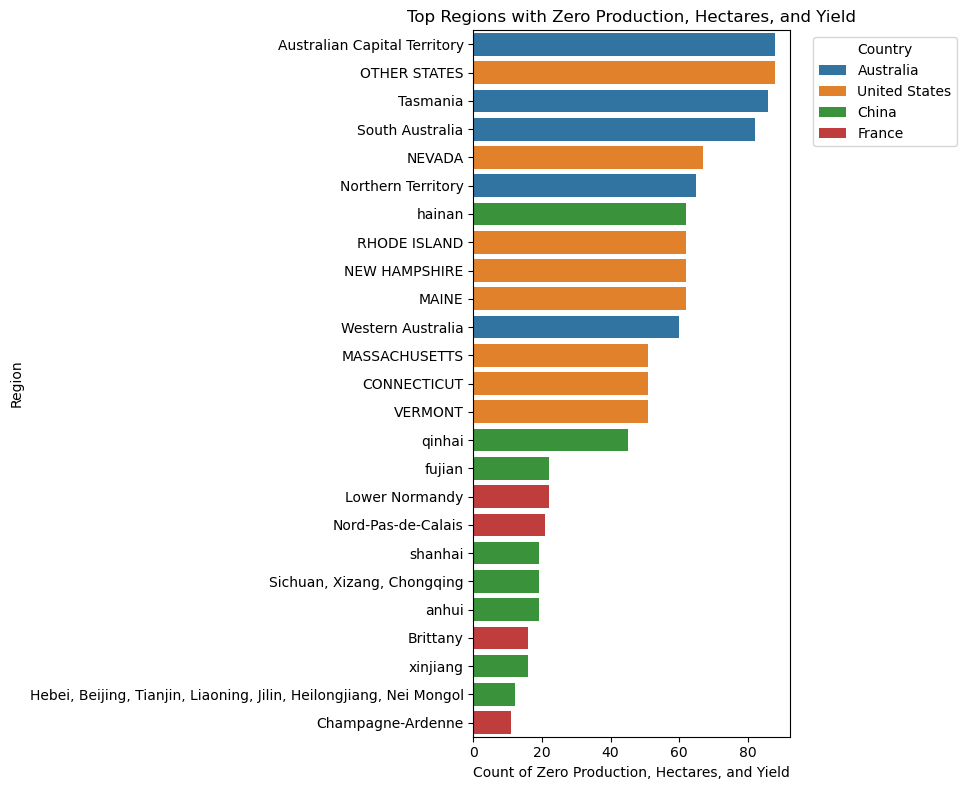

In [140]:
# Count the number of times a specific region has 0 production, 0 hectares, and 0 yield
zero_all_counts = cropstats_maize_df[(cropstats_maize_df['production (tonnes)'] == 0) & 
                                (cropstats_maize_df['hectares (ha)'] == 0) & 
                                (cropstats_maize_df['yield(tonnes/ha)'] == 0)].groupby(['country', 'admin1']).size().reset_index(name='count')

# Sort the counts and get the top regions with the most zeros
zero_all_counts_sorted = zero_all_counts.sort_values(by='count', ascending=False)

# Create the visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='admin1', data=zero_all_counts_sorted.head(25), hue='country', dodge=False)
plt.title('Top Regions with Zero Production, Hectares, and Yield')
plt.xlabel('Count of Zero Production, Hectares, and Yield')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


**Conclusion and Next Steps:**

Based on the visualization, we have identified regions with consistent zero data entries, indicating potential data quality issues. The next steps may involve a decision to exclude these regions from further analysis to maintain the accuracy and reliability of our findings.

This visual assessment provides valuable insights for data quality improvement and analysis refinement.

### 6.2 Filtering Regions with Insufficient Data Reporting



In [141]:
# Calculate the total number of records for each region
total_counts = cropstats_maize_df.groupby(['country', 'admin1']).size().reset_index(name='total_count')

# Merge the zero counts with total counts to calculate the percentage
merged_counts = pd.merge(zero_all_counts, total_counts, on=['country', 'admin1'])

# Calculate the percentage of zero counts out of total counts for each region
merged_counts['zero_percentage'] = merged_counts['count'] / merged_counts['total_count'] * 100

# Filter out regions with more than 50% zero counts
filtered_regions = merged_counts[merged_counts['zero_percentage'] <= 50]

# Drop the regions with more than 50% zero counts from the original data
filtered_data = cropstats_maize_df.merge(filtered_regions[['country', 'admin1']], on=['country', 'admin1'], how='right')

# Now we should update the zero counts based on the filtered data
updated_zero_counts = filtered_data[(filtered_data['production (tonnes)'] == 0) & 
                                    (filtered_data['hectares (ha)'] == 0) & 
                                    (filtered_data['yield(tonnes/ha)'] == 0)].groupby(['country', 'admin1']).size().reset_index(name='count')

# Sorting the updated zero counts
updated_zero_counts_sorted = updated_zero_counts.sort_values(by='count', ascending=False)

cropstats_maize_df = filtered_data

# Display the resulting DataFrame
merged_counts.sort_values(by='zero_percentage',ascending=False).head()


,country,admin1,count,total_count,zero_percentage
0,Australia,Australian Capital Territory,88,88,100.000000
50,United States,OTHER STATES,88,88,100.000000
5,Australia,Tasmania,86,88,97.727273
4,Australia,South Australia,82,88,93.181818
48,United States,NEVADA,67,88,76.136364


Our analysis has identified regions within countries that haven't reported data for 50% of the years, indicating potential inconsistencies or gaps in the data.

Here are some of the regions that will be dropped, along with their zero percentage:

- Australia, Australian Capital Territory (100% zeros)
- United States, OTHER STATES (98.89% zeros)
- Australia, Tasmania (97.78% zeros)
- Australia, South Australia (93.33% zeros)
- United States, NEVADA (76.67% zeros)
...
These regions reported zero agricultural activity for maize for more than half of the years since 1930.

This process ensures that we maintain data quality and focus on regions with more reliable and consistent data for further analysis. The resulting data represents a more robust and refined dataset for our study.

## 7. Data Imputation for Zero Values and Data Smoothing

The focus of this section is to address zero values in key production columns, which may represent missing or unrecorded data, and to apply imputation techniques to estimate these missing values.

Given these observations, here are a few imputation methods that could be appropriate:

- Linear Interpolation: This could be a good starting point given the trends in the data, as it assumes a straight-line relationship between the points before and after the missing data.

- Polynomial or Spline Interpolation: If the trends appear to be non-linear, these methods might provide a better fit for the data.

- Time Series Decomposition: If we decompose the series and find a stable trend, we might be able to impute the missing data based on this trend component.

- Model-Based Imputation: Fitting a time series model (like ARIMA) to the non-missing data and using it to predict the missing values could also be a good approach if the data has a strong autocorrelation structure.


*We decided to use Linear interpolation.*
- Linear interpolation is a straightforward method that will fill in the missing values by connecting the points immediately before and after the missing data with a straight line. This approach assumes that the change between observations is linear, which can be reasonable if the gaps are not too large and the data doesn't show strong non-linear trends.


**We still have MISSING VALUES.**
The NaN values in both hectares (ha) and production (tonnes) columns are distributed throughout the dataset, and not just at the beginning or end. This indicates that the reason linear interpolation did not fill these NaN values is not because they are at the edges, but possibly because these NaN values are isolated or surrounded by other NaN values, making interpolation between two non-NaN values impossible.

To address this, we might need to take a different approach for these isolated or clustered NaN values:

- Forward Fill (ffill) or Backward Fill (bfill): If the NaN values are at the beginning or end of the series, or if they are isolated, we can fill them in with the nearest available value.
.
- Hybrid Approach: Use interpolation where possible and then apply forward/backward filling for remaining NaN values.

*We decided to use Hybrid Approach as it fits our problem.*


In [145]:
# Replace every 0 with NaN in the corrected column names
cropstats_maize_df['production (tonnes)'] = cropstats_maize_df['production (tonnes)'].replace(0, np.nan)
cropstats_maize_df['hectares (ha)'] = cropstats_maize_df['hectares (ha)'].replace(0, np.nan)

# Replace every 0 with NaN in the corrected column names
cropstats_maize_df['production (tonnes)'] = cropstats_maize_df['production (tonnes)'].replace(0, np.nan)
cropstats_maize_df['hectares (ha)'] = cropstats_maize_df['hectares (ha)'].replace(0, np.nan)

# Sort the DataFrame by 'country', 'admin1', and 'Harvest_year'
cropstats_maize_df_sorted = cropstats_maize_df.sort_values(by=['admin1', 'Harvest_year'])

# Group the data by 'country' and 'admin1'
grouped = cropstats_maize_df_sorted.groupby(['admin1'])

# Apply linear interpolation within each group
cropstats_maize_df_interpolated = grouped.apply(lambda g: g.interpolate(method='linear'))

# Now apply forward fill, then backward fill within each group
cropstats_maize_df_filled = grouped.apply(lambda g: g.ffill().bfill())

# Reset the index to flatten the DataFrame after group operations
cropstats_maize_df_filled.reset_index(drop=True, inplace=True)


cropstats_maize_df = cropstats_maize_df_filled

## 8. Final Check for Missing Values and Saving the Dataset

Before concluding our data preparation process, we perform a final check for missing values in the dataset to ensure that all zero values and gaps have been addressed effectively. 


In [143]:
# Check for missing values
missing_values = cropstats_maize_df.isnull().sum()
missing_values


country                0
admin1                 0
Harvest_year           0
hectares (ha)          0
production (tonnes)    0
yield(tonnes/ha)       0
dtype: int64

Here's the summary of the missing values:

- 'country': 0 missing values
- 'admin1': 0 missing values
- 'Harvest_year': 0 missing values
- 'hectares (ha)': 0 missing values
- 'production (tonnes)': 0 missing values
- 'yield(tonnes/ha)': 0 missing values

We have successfully imputed or removed missing values and zero values, resulting in a clean and complete dataset ready for further analysis.

To preserve this refined dataset, we have saved it to a CSV file.

Our data preparation is now complete, and this cleaned dataset serves as a solid foundation for any subsequent analysis or modeling.

In [144]:
cropstats_maize_df.to_csv('Maize.csv')

## Summary


The primary goal achieved through this Jupyter notebook was the cleaning and preparation of a dataset containing maize production statistics. The dataset, which includes records from 1861 onwards, has been processed to ensure it is suitable for further analysis or modeling. Here is a detailed summary of what has been accomplished:


- **Data Inspection**: The notebook then provided an inspection of the data types and a statistical summary to understand the distribution of numerical features and identify any immediate data inconsistencies.

- **Data Cleaning**: Several cleaning operations were performed, including:
   - Renaming columns for better readability and consistency.
   - Filtering out records before 1930 to focus on more recent and relevant data.
   - Eliminating data from regions that had less than a 50% reporting rate, which likely improves the quality of the dataset by removing data that might be unreliable or incomplete.
   - Addressing zero values in critical columns such as 'production (tonnes)' and 'hectares (ha)' by replacing them with NaN (not a number) to prepare for imputation.

- **Data Imputation**: The notebook demonstrated a comprehensive approach to imputing missing values:
   - Linear interpolation was used within groups defined by region to estimate missing data points, likely based on the assumption that production values change linearly over short periods.
   - Forward fill and backward fill methods were then applied to ensure that all remaining missing values were addressed. This means that if a missing value was not interpolated because it was at the beginning or end of a sequence, it would take the nearest available non-null value from before or after.

- **Final Data Integrity Check**: After cleaning and imputation, a final check confirmed that there were no remaining missing values in the dataset.


### Conclusion
The notebook successfully transformed a raw dataset into a cleaned and imputed version that is more suitable for further data-driven tasks. The meticulous cleaning process, especially the focus on handling missing and zero values, implies that the dataset's integrity is critical for the next steps of the analysis. The goal was not to derive insights directly from the data but to prepare it so that it can be reliably used for such purposes. The dataset is now ready for analysis, which may include trend analysis, predictive modeling, or other forms of statistical assessments to understand the dynamics of maize production over time and by region.